In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import docs.source.filters as filters
import sympy
sympy.init_printing()

4/4 BPF Response

In [2]:
z = sympy.symbols('z')

k, alpha, j, Ch, Cr = sympy.symbols('k, alpha, j, Ch, Cr')
H_44_z = k / (1 - (alpha + j*(1-alpha))*z**-1)
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

print('H_44_z, k, alpha = ')
H_44_z, k, alpha

H_44_z, k, alpha = 


In [3]:
# #Variables
Ch = 20e-12
Cr = 75e-15
fs = 9.6e9

H_44, omega, Zo, fc = filters.DFTF('BPF44', Ch, Cr, fs)

# Convert normalized frequencies (omega) to Hz
frequencies_1 = omega * fs / (2 * np.pi)

4/4 BPF Ch = 2e-11 Cr = 7.5e-14 Fs = 9600000000.0
Zo =  1388.888888888889
Fc =  5.729551094138192  MHz
arctan(Cr / Ch) =  0.0037499824220233137
fs / (2 * np.pi) =  1527887453.6821952


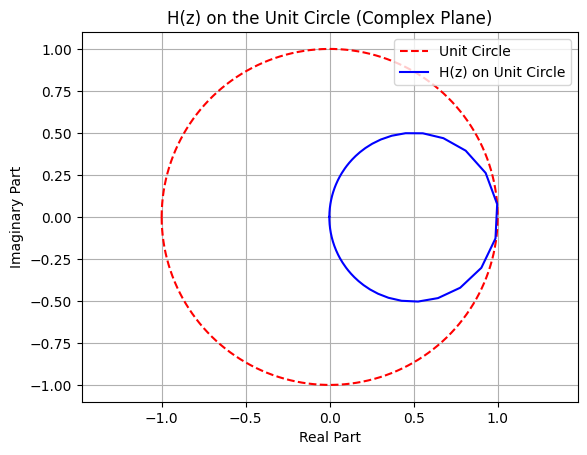

In [4]:
# Unit circle in the complex plane
unit_circle = np.exp(1j * omega)

# Plot the unit circle
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
# Plot H(z) on the complex plane
plt.plot(np.real(H_44), np.imag(H_44), 'b', label='H(z) on Unit Circle')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()

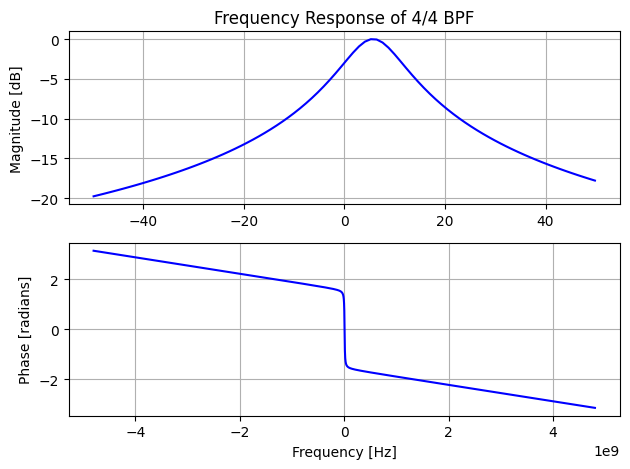

In [5]:
# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask_1 = (frequencies_1 >= freq_range_min) & (frequencies_1 <= freq_range_max)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(frequencies_1[mask_1]/1e6, 20 * np.log10(np.abs(H_44[mask_1])), 'b')
plt.title('Frequency Response of 4/4 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(H_44))
plt.plot(frequencies_1, angles, 'b')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.tight_layout()


4/8 BPF Filter Response

H_48_z, k, alpha = 


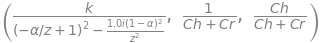

In [6]:
z = sympy.symbols('z')

k, alpha, j, Ch, Cr = sympy.symbols('k, alpha, j, Ch, Cr')
H_48_z = k / (((1 - alpha*z**(-1))**2) - ((((1 - alpha)*z**(-1))**2) * 1j))
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

print('H_48_z, k, alpha = ')
H_48_z, k, alpha

In [7]:
#Variables
Ch = 6.65e-12 
Cr = 500e-15 
fs = 600e6

H_48, omega, Zo, fc = filters.DFTF('BPF48', Ch, Cr, fs)

# Convert normalized frequencies (omega) to Hz
frequencies_2 = omega * fs / (2 * np.pi)


4/8 BPF Ch = 6.65e-12 Cr = 5e-13 Fs = 600000000.0
Zo =  3333.3333333333335
Fc =  4.816587210356899  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.05043918331810598
fs / (2 * np.pi) =  95492965.8551372


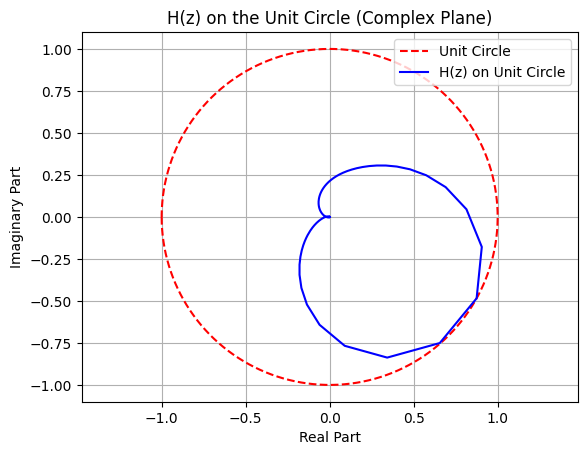

In [8]:
# Unit circle in the complex plane
unit_circle = np.exp(1j * omega)

# Plot the unit circle
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
# Plot H(z) on the complex plane
plt.plot(np.real(H_48), np.imag(H_48), 'b', label='H(z) on Unit Circle')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.show()

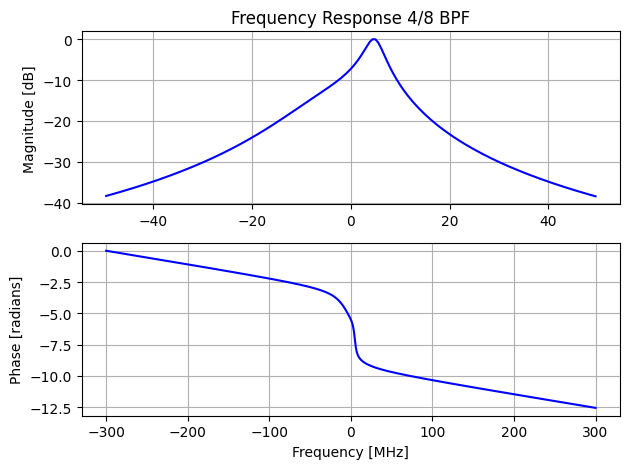

In [9]:
# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask_2 = (frequencies_2 >= freq_range_min) & (frequencies_2 <= freq_range_max)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(frequencies_2[mask_2]/1e6, 20 * np.log10(np.abs(H_48[mask_2])), 'b')
plt.title('Frequency Response 4/8 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(H_48))
plt.plot(frequencies_2/1e6, angles, 'b')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [MHz]')
plt.grid()
plt.tight_layout()

4/8 BPF with cross-connected transconductors

H_48_z, k, alpha = 


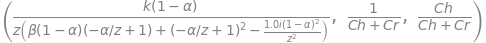

In [10]:
z = sympy.symbols('z')

beta, k, alpha, j, Ch, Cr = sympy.symbols('beta, k, alpha, j, Ch, Cr')
H_48_cc_z = (k * (1 - alpha) * z**-1) / (((1 - alpha*z**(-1))**2) + (((1 - alpha * z**-1) * (1 - alpha))*beta) - (((1 - alpha)**2)) * 1j * z**-2)
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

print('H_48_z, k, alpha = ')
H_48_cc_z, k, alpha

In [11]:
#Variables
Ch = 6.65e-12 
Cr = 500e-15 
beta = -0.4
fs = 600e6

H_48_cc, omega, Zo, fc = filters.DFTF('BPF48CC', Ch, Cr, fs, beta)

# Convert normalized frequencies (omega) to Hz
frequencies_3 = omega * fs / (2 * np.pi)

4/8 BPF CC Ch = 6.65e-12 Cr = 5e-13 Fs = 600000000.0 Beta = -0.4
Zo =  3333.3333333333335
Fc =  4.816587210356899  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.05043918331810598
fs / (2 * np.pi) =  95492965.8551372


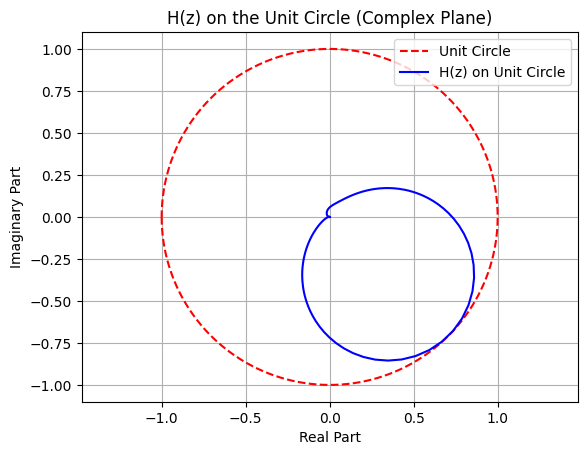

In [12]:
# Unit circle in the complex plane
unit_circle = np.exp(1j * omega)

# Plot the unit circle
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
# Plot H(z) on the complex plane
plt.plot(np.real(H_48_cc), np.imag(H_48_cc), 'b', label='H(z) on Unit Circle')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.show()

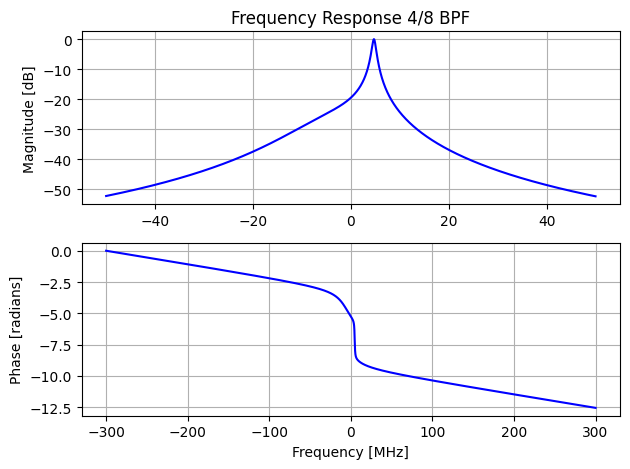

In [13]:
# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask_3 = (frequencies_3 >= freq_range_min) & (frequencies_3 <= freq_range_max)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(frequencies_3[mask_3]/1e6, 20 * np.log10(np.abs(H_48_cc[mask_3])), 'b')
plt.title('Frequency Response 4/8 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(H_48_cc))
plt.plot(frequencies_3/1e6, angles, 'b')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [MHz]')
plt.grid()
plt.tight_layout()

Comparison

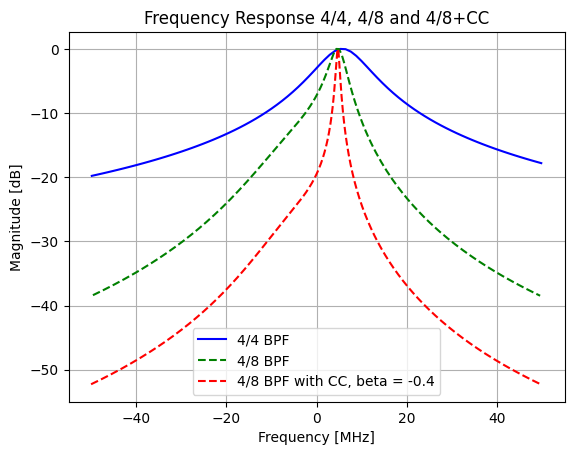

In [14]:
plt.plot(frequencies_1[mask_1]/1e6, 20 * np.log10(np.abs(H_44[mask_1])), 'b', label='4/4 BPF')
plt.ylabel('Magnitude [dB]')
plt.plot(frequencies_2[mask_2]/1e6, 20 * np.log10(np.abs(H_48[mask_2])), 'g--', label='4/8 BPF')
plt.plot(frequencies_3[mask_3]/1e6, 20 * np.log10(np.abs(H_48_cc[mask_3])), 'r--', label='4/8 BPF with CC, beta = -0.4')
plt.grid()
plt.xlabel('Frequency [MHz]')
plt.title('Frequency Response 4/4, 4/8 and 4/8+CC')
plt.legend()

Capacitor Bank Test For 4/4 BPF

4/4 BPF Ch = 2e-11 Cr = 7.5e-14 Fs = 9600000000.0
Zo =  1388.888888888889
Fc =  5.729551094138192  MHz
arctan(Cr / Ch) =  0.0037499824220233137
fs / (2 * np.pi) =  1527887453.6821952
4/4 BPF Ch = 2e-11 Cr = 1.5e-13 Fs = 9600000000.0
Zo =  694.4444444444445
Fc =  11.458941050694495  MHz
arctan(Cr / Ch) =  0.0074998593797459025
fs / (2 * np.pi) =  1527887453.6821952
4/4 BPF Ch = 2e-11 Cr = 3e-13 Fs = 9600000000.0
Zo =  347.22222222222223
Fc =  22.916593163858153  MHz
arctan(Cr / Ch) =  0.014998875151850595
fs / (2 * np.pi) =  1527887453.6821952
4/4 BPF Ch = 2e-11 Cr = 6e-13 Fs = 9600000000.0
Zo =  173.61111111111111
Fc =  45.82288004414553  MHz
arctan(Cr / Ch) =  0.0299910048568779
fs / (2 * np.pi) =  1527887453.6821952
4/4 BPF Ch = 2e-11 Cr = 1.2e-12 Fs = 9600000000.0
Zo =  86.80555555555556
Fc =  91.56347633201392  MHz
arctan(Cr / Ch) =  0.05992815512120788
fs / (2 * np.pi) =  1527887453.6821952
4/4 BPF Ch = 4e-11 Cr = 7.5e-14 Fs = 9600000000.0
Zo =  1388.888888888889
Fc =  2.864785618

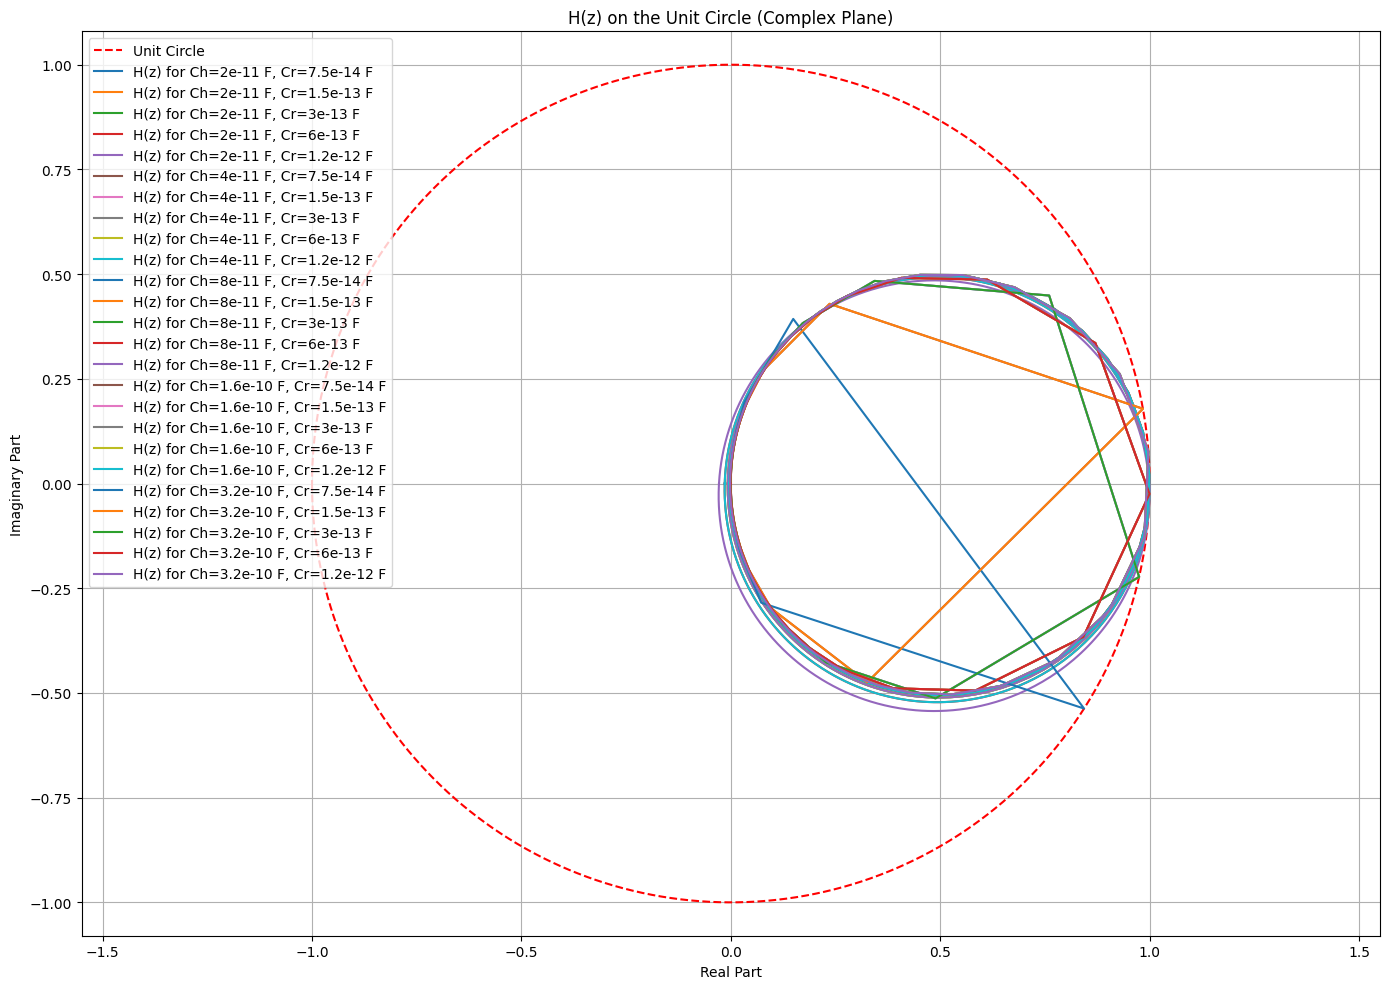

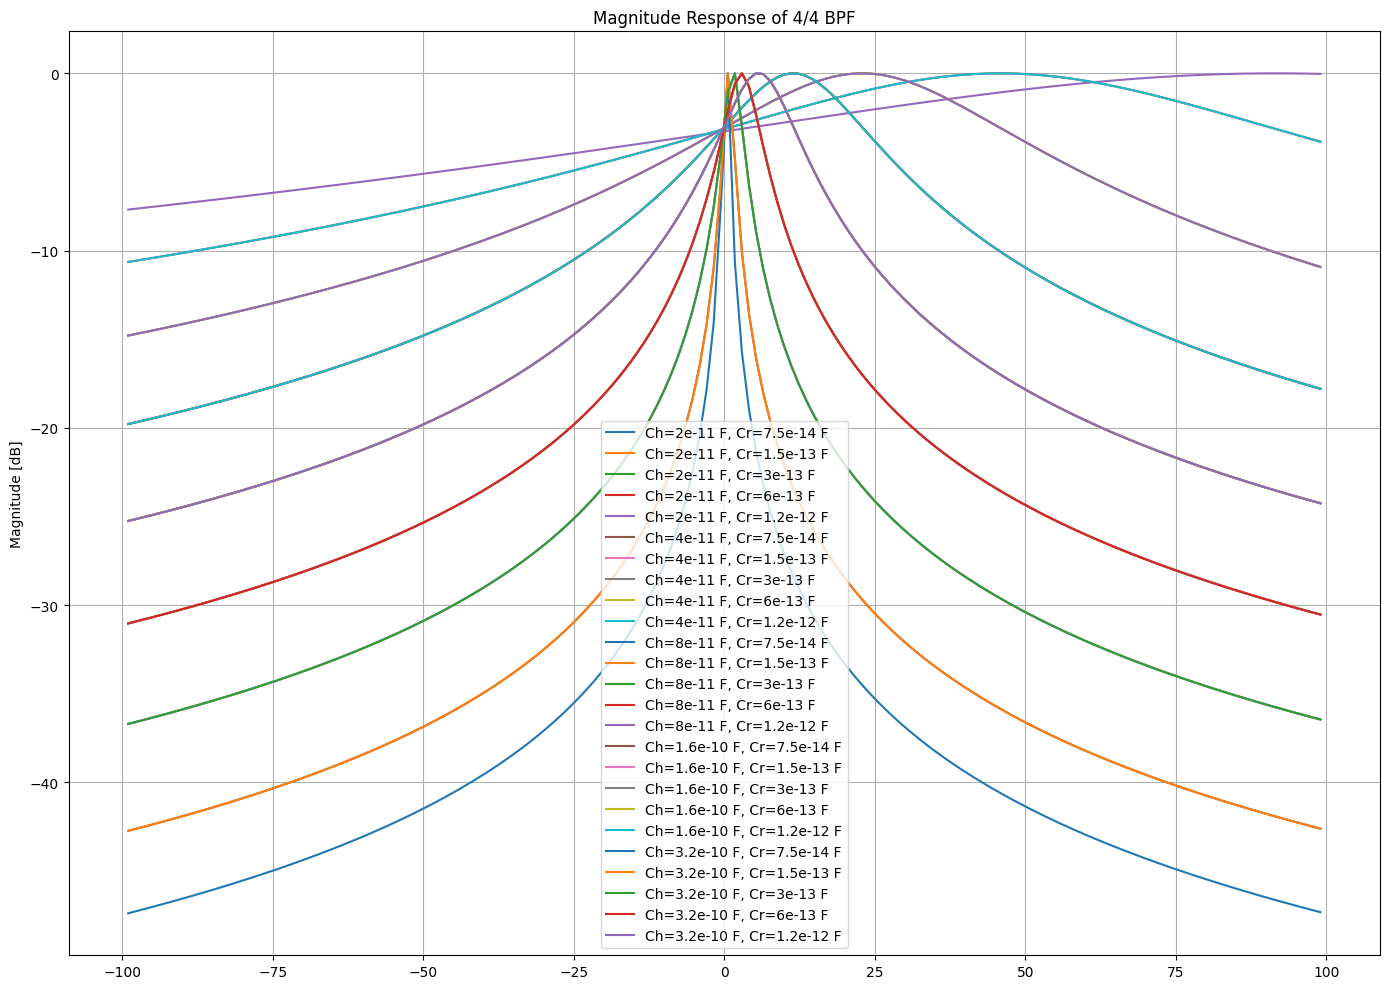

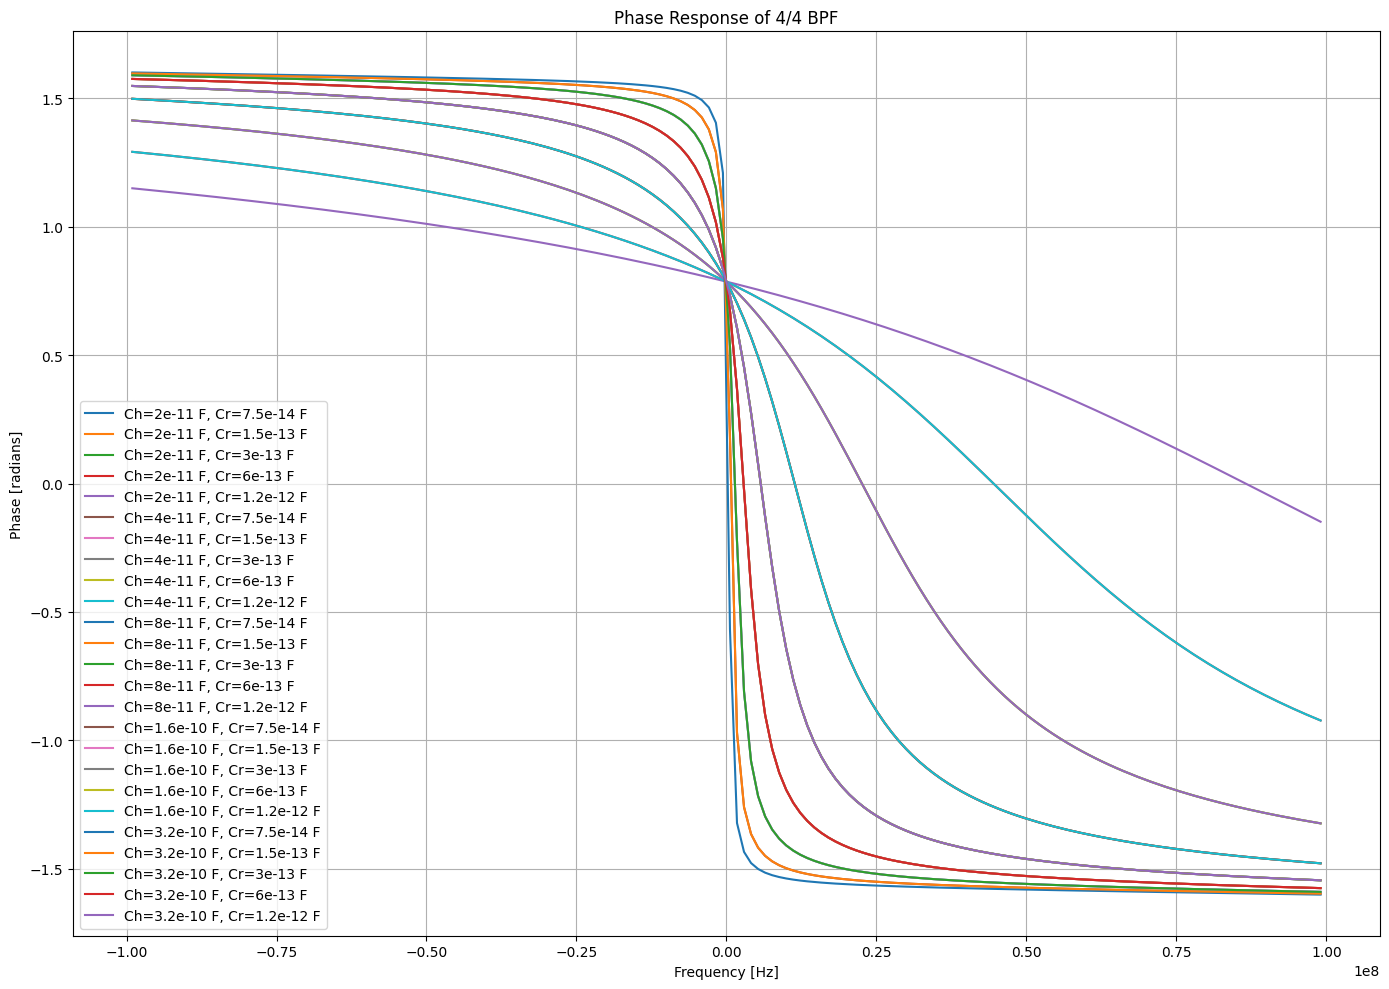

In [15]:
# Variables
Ch = [20e-12, 2*20e-12, 4*20e-12, 8*20e-12, 16*20e-12]
Cr = [75e-15, 2*75e-15, 4*75e-15, 8*75e-15, 16*75e-15]
fs = 9.6e9

# Initialize 2D arrays
H_44 = np.zeros((len(Ch), len(Cr)), dtype=object)  # Use dtype=object to store arrays in H_44
Zo = np.zeros((len(Ch), len(Cr)))
fc = np.zeros((len(Ch), len(Cr)))

for j in range(len(Ch)):
    for i in range(len(Cr)):
        H_44[j][i], omega, Zo[j][i], fc[j][i] = filters.DFTF('BPF44', Ch[j], Cr[i], fs)
        
        # Convert normalized frequencies (omega) to Hz
frequencies = omega * fs / (2 * np.pi)

# Define the frequency range for plotting
freq_range_min = -100e6
freq_range_max = 100e6  

# Apply the frequency range filter
mask = (frequencies >= freq_range_min) & (frequencies <= freq_range_max)

# 1. Unit Circle Plot
plt.figure(figsize=(14, 10))
plt.figure(1)
unit_circle = np.exp(1j * omega)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
for j in range(len(Ch)):
    for i in range(len(Cr)):
        plt.plot(np.real(H_44[j][i]), np.imag(H_44[j][i]), label=f'H(z) for Ch={Ch[j]} F, Cr={Cr[i]} F')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.tight_layout()

# 2. Magnitude Response Plot
plt.figure(figsize=(14, 10))
plt.figure(2)
for j in range(len(Ch)):
    for i in range(len(Cr)):
        plt.plot(frequencies[mask]/1e6, 20 * np.log10(np.abs(H_44[j][i][mask])), label=f'Ch={Ch[j]} F, Cr={Cr[i]} F')
plt.title('Magnitude Response of 4/4 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.legend()
plt.tight_layout()


# 3. Phase Response Plot
plt.figure(figsize=(14, 10))
plt.figure(3)
for j in range(len(Ch)):
    for i in range(len(Cr)):
        angles = np.unwrap(np.angle(H_44[j][i][mask]))
        plt.plot(frequencies[mask], angles, label=f'Ch={Ch[j]} F, Cr={Cr[i]} F')
plt.title('Phase Response of 4/4 BPF')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.legend()
plt.tight_layout()


plt.show()



Capacitor Bank Test For 4/8 BPF

4/8 BPF Ch = 6.65e-12 Cr = 5e-13 Fs = 600000000.0
Zo =  3333.3333333333335
Fc =  4.816587210356899  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.05043918331810598
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF Ch = 6.65e-12 Cr = 1e-12 Fs = 600000000.0
Zo =  1666.6666666666667
Fc =  9.14992171040567  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.09581775608777403
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF Ch = 6.65e-12 Cr = 2e-12 Fs = 600000000.0
Zo =  833.3333333333334
Fc =  16.57793588505079  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.1736037386271939
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF Ch = 6.65e-12 Cr = 4e-12 Fs = 600000000.0
Zo =  416.6666666666667
Fc =  27.692435328116858  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.28999450462274123
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF Ch = 6.65e-12 Cr = 8e-12 Fs = 600000000.0
Zo =  208.33333333333334
Fc =  41.14318361639557  MHz
arc

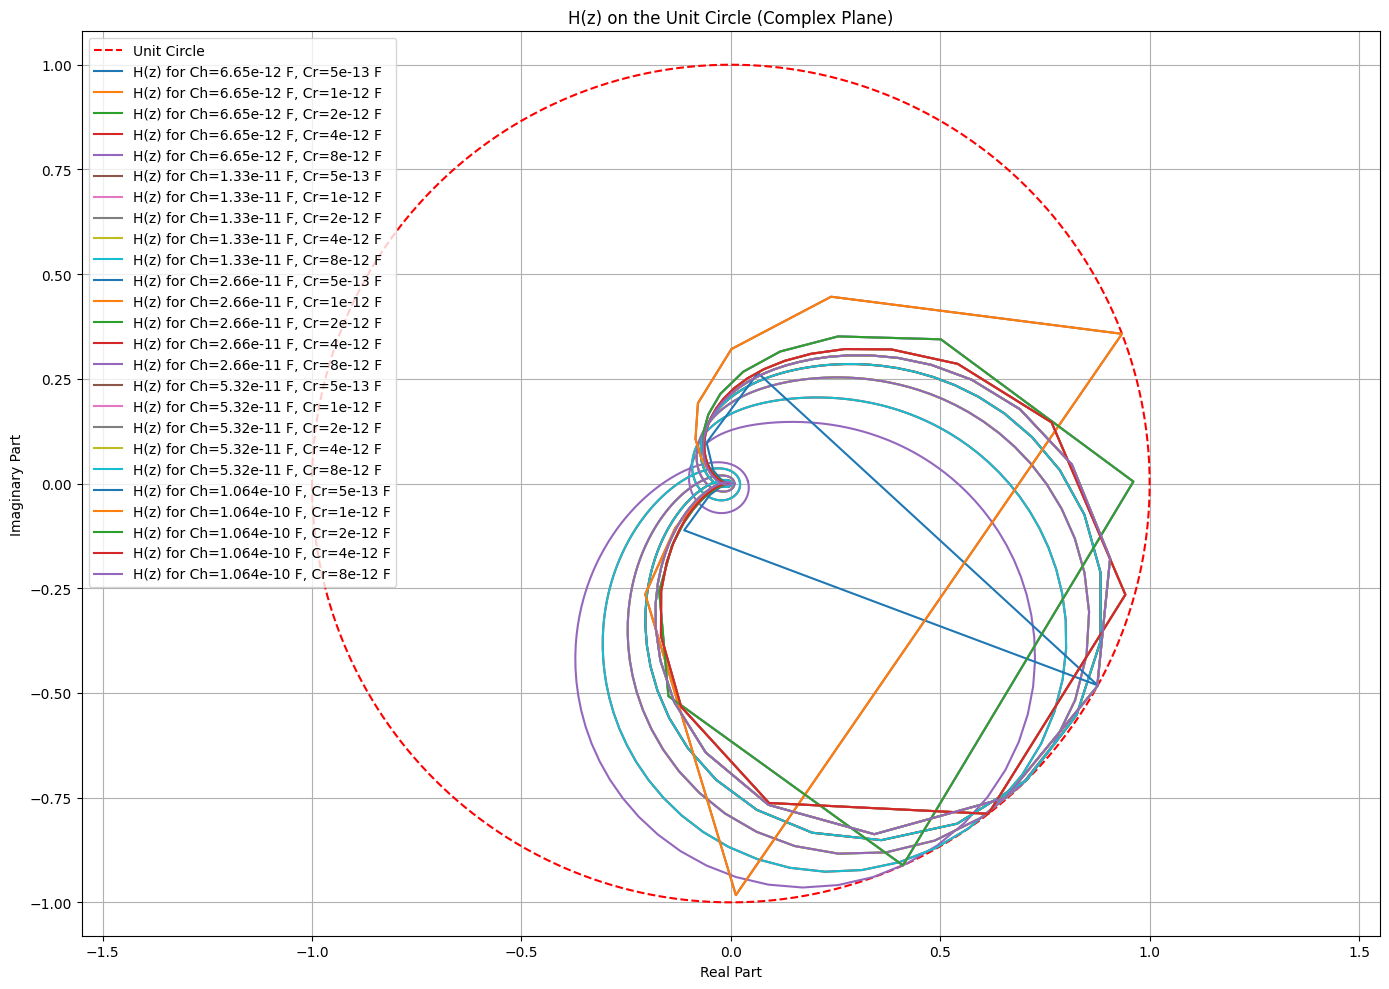

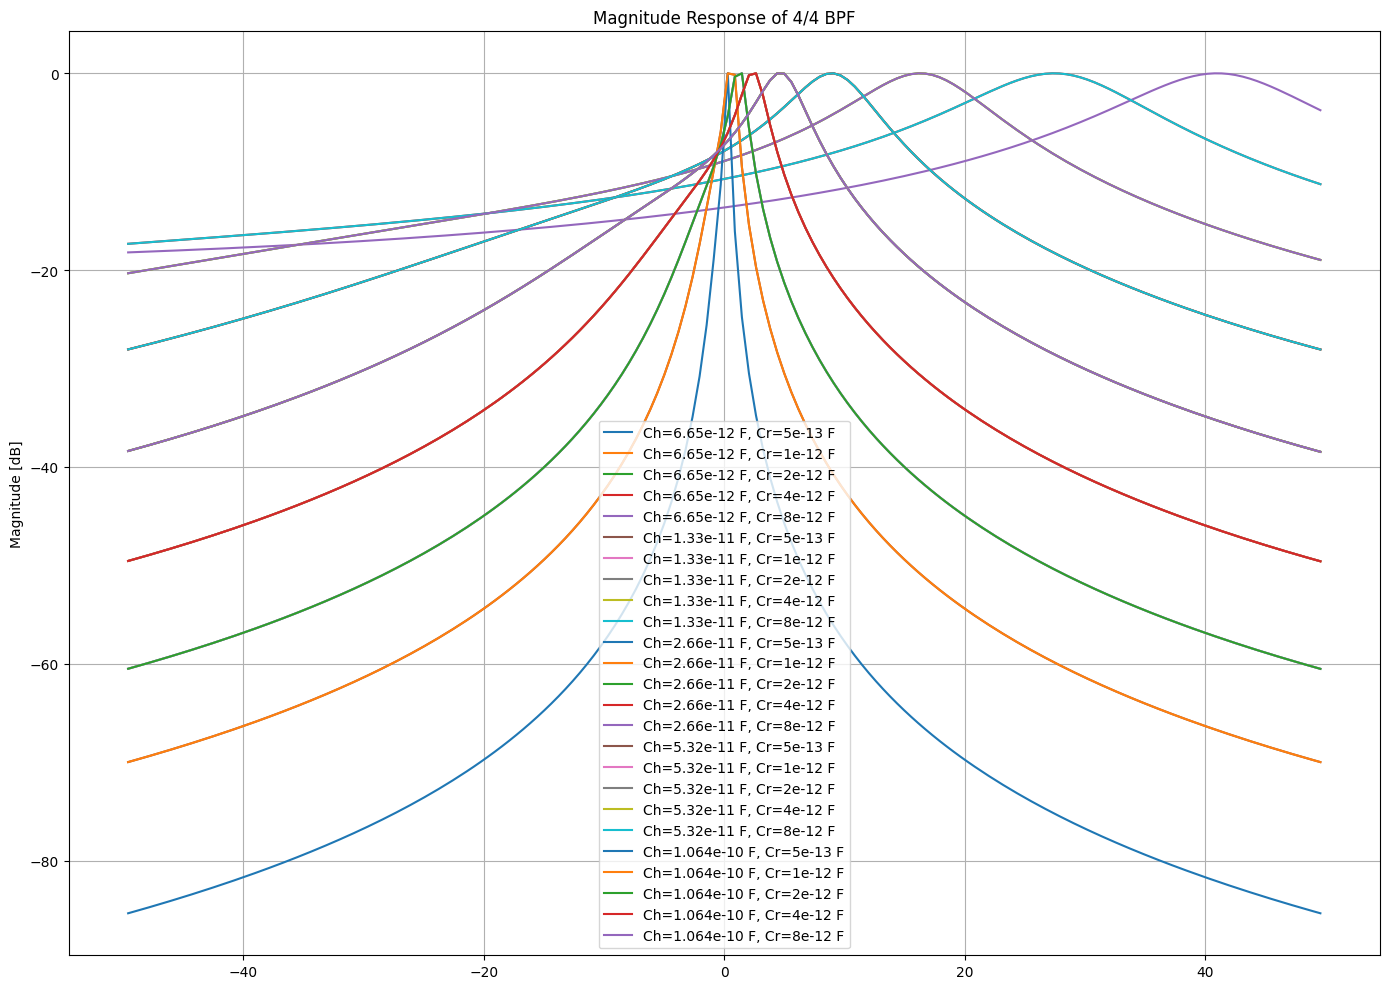

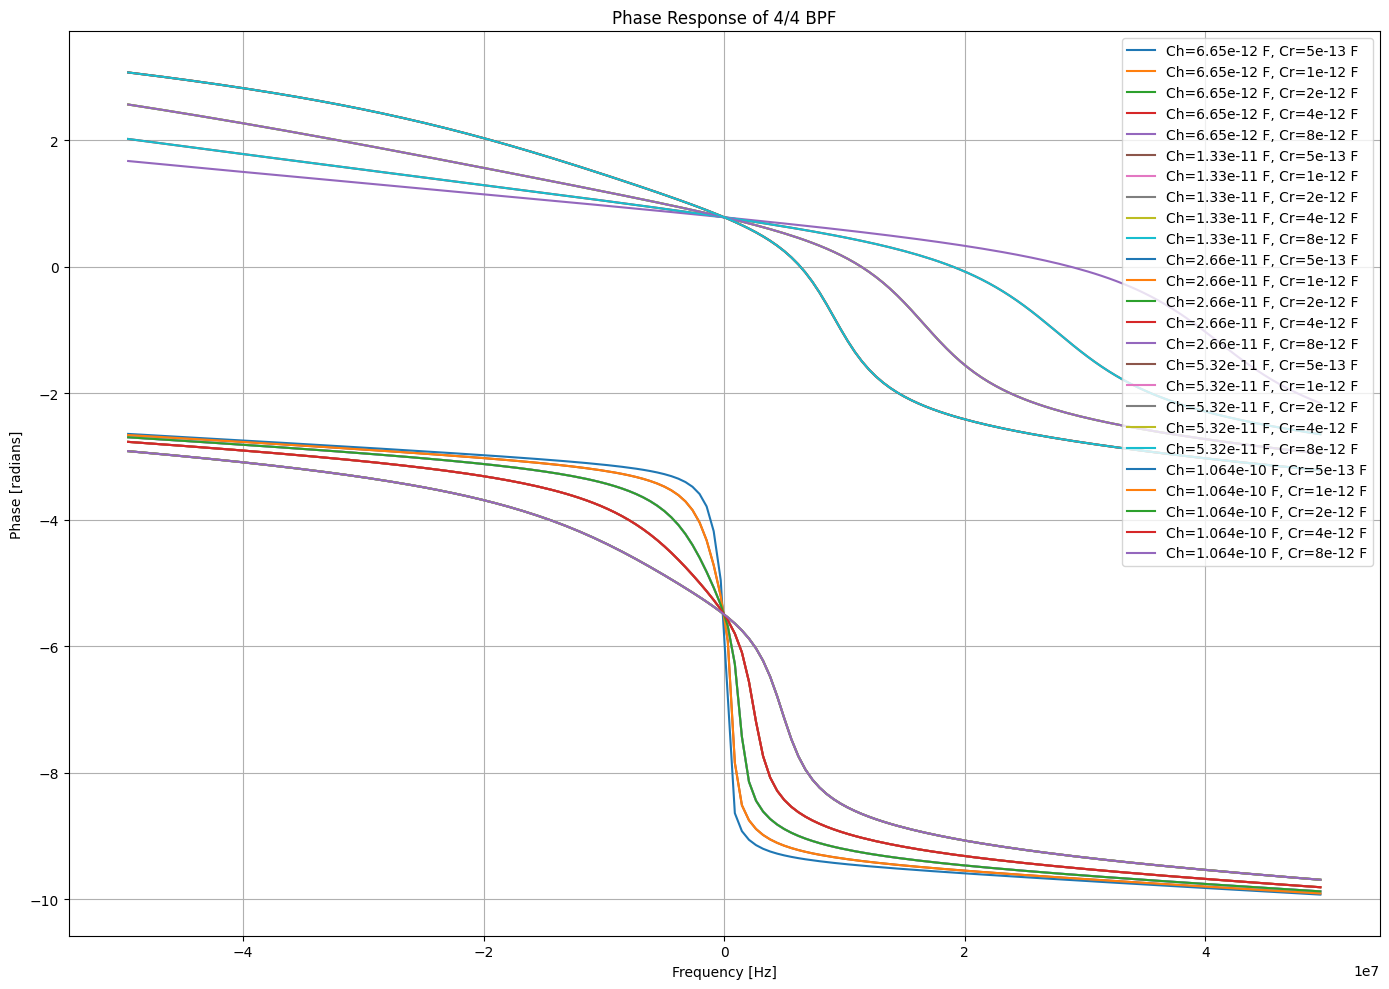

In [16]:
# Variables
Ch = [6.65e-12, 2*6.65e-12, 4*6.65e-12, 8*6.65e-12, 16*6.65e-12]
Cr = [500e-15, 2*500e-15, 4*500e-15, 8*500e-15, 16*500e-15]
fs = 600e6

# Initialize 2D arrays
H_48 = np.zeros((len(Ch), len(Cr)), dtype=object)
Zo = np.zeros((len(Ch), len(Cr)))
fc = np.zeros((len(Ch), len(Cr)))

for j in range(len(Ch)):
    for i in range(len(Cr)):
        H_48[j][i], omega, Zo[j][i], fc[j][i] = filters.DFTF('BPF48', Ch[j], Cr[i], fs)
        
        # Convert normalized frequencies (omega) to Hz
frequencies = omega * fs / (2 * np.pi)

# Define the frequency range for plotting
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask = (frequencies >= freq_range_min) & (frequencies <= freq_range_max)

# 1. Unit Circle Plot
plt.figure(figsize=(14, 10))
plt.figure(1)
unit_circle = np.exp(1j * omega)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
for j in range(len(Ch)):
    for i in range(len(Cr)):
        plt.plot(np.real(H_48[j][i]), np.imag(H_48[j][i]), label=f'H(z) for Ch={Ch[j]} F, Cr={Cr[i]} F')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.tight_layout()

# 2. Magnitude Response Plot
plt.figure(figsize=(14, 10))
plt.figure(2)
for j in range(len(Ch)):
    for i in range(len(Cr)):
        plt.plot(frequencies[mask]/1e6, 20 * np.log10(np.abs(H_48[j][i][mask])), label=f'Ch={Ch[j]} F, Cr={Cr[i]} F')
plt.title('Magnitude Response of 4/4 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.legend()
plt.tight_layout()


# 3. Phase Response Plot
plt.figure(figsize=(14, 10))
plt.figure(3)
for j in range(len(Ch)):
    for i in range(len(Cr)):
        angles = np.unwrap(np.angle(H_48[j][i][mask]))
        plt.plot(frequencies[mask], angles, label=f'Ch={Ch[j]} F, Cr={Cr[i]} F')
plt.title('Phase Response of 4/4 BPF')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.legend()
plt.tight_layout()


plt.show()



Capacitor Bank Test For 4/8 BPF CC